# AB-тестирование
## Задание AB.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 — 30 баллов
* Задача 2 — 60 баллов
* Задача 3 — 40 баллов
* Задача 4 — 100 баллов



In [ ]:
# Bot check

# HW_ID: ds_ab4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from statsmodels.stats.proportion import proportion_confint
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

---
### Задача 1.

Выведите формулу MDE для относительного t-теста.

*Прикрепил отдельным файлом AB4.pdf*

---
### Задача 2.

Продолжим планировать АБ-тест из задачи AB.3.2. Поскольку пользователей достаточно много, предлагается рассмотреть возможность использования метода бакетов. И хотя все данные помещаются в память, отработать навык стоит на простых примерах.

Выберите некоторым образом количество бакетов и обоснуйте свой выбор.

*например, 10, чтобы во всех бакетах точно было достаточно объектов*

Выполните разделение на бакеты и проверьте, что количество пользователей в бакетах примерно одинаковое. Подумайте, как лучше выполнить такую проверку.

In [47]:
df = pd.read_csv('miptstats_metrica.tsv', sep='\t')
df['ym:s:dateTimeUTC'] = pd.to_datetime(df['ym:s:dateTimeUTC'])
print(len(df), df['ym:s:clientID'].nunique())
df.rename(columns={'ym:s:clientID':'user_id'}, inplace=True)
df.head(3)

387353 162474


,ym:s:visitID,user_id,ym:s:dateTimeUTC,ym:s:startURL,ym:s:endURL,ym:s:pageViews,ym:s:visitDuration,ym:s:isNewUser,ym:s:bounce,ym:s:regionCountry,...,ym:s:browserCountry,ym:s:mobilePhone,ym:s:operatingSystemRoot,ym:s:browser,ym:s:browserEngine,ym:s:screenOrientation,ym:s:screenWidth,ym:s:screenHeight,ym:s:windowClientWidth,ym:s:windowClientHeight
0,1.801686e+19,1568056026568729022,2020-01-01 03:28:50,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,1,0,1,Russia,...,gb,NaN,gnu_linux,chrome,WebKit,2,1920,1080,1905,981
1,1.802359e+19,1577864187752491163,2020-01-01 10:36:27,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,9,215,1,0,Singapore,...,us,apple,ios_double,safari_mobile,WebKit,1,375,667,375,559
2,1.802460e+19,1567765219104836417,2020-01-01 11:40:44,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,88,0,0,Russia,...,ru,apple,ios_double,yandex_browser,WebKit,1,414,736,414,660


In [48]:
def bucket_transform(data, num_buckets):
    '''Создает бакеты из данных, нашел более прикольный способ через pd.qcut'''
    data['bucket'], _ = pd.qcut(data['user_id'].rank(method='first'), num_buckets, labels=False, retbins=True)
    return data

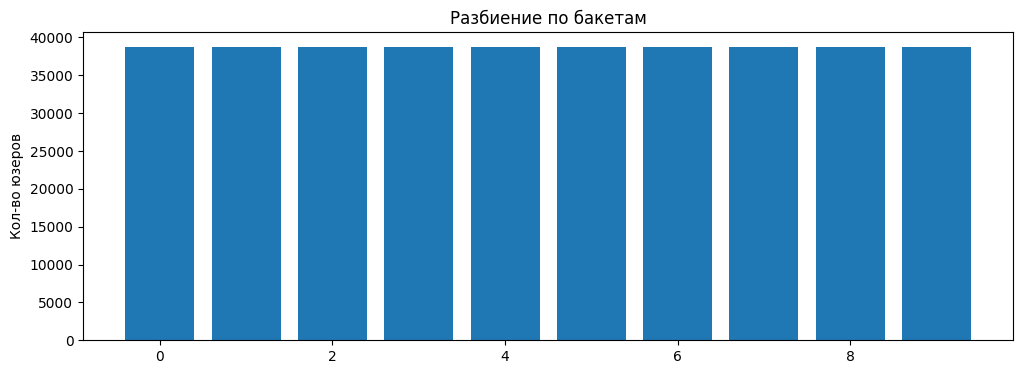

In [49]:
df = bucket_transform(df, 10)
cnt = df.groupby('bucket')['user_id'].count().reset_index()

plt.figure(figsize=(12,4))
plt.bar(cnt['bucket'], cnt['user_id'])
plt.ylabel('Кол-во юзеров')
plt.title('Разбиение по бакетам')
plt.show()

*Разбиение получилось равномерным*

Аналогично задаче AB.3.2 провалидируйте метод бакетов, проведя серию АА-тестов по историческим данным, семплируя момент времени начала эксперимента и сами группы пользователей.

In [50]:
def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
    '''
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
    return prob_reject, left_bound, right_bound


def visualization(prob_reject, left_bound, right_bound, pvals=None, alpha=0.05, title=None):
    '''
    Отрисовка интервала для вероятности отвержения критерия 
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    '''
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(14,3))
        plt.subplot(1, 2, 1)
        plt.hist(pvals, bins=np.linspace(0, 1, 21), alpha=0.7, weights=np.ones(len(pvals)) / len(pvals))
        plt.title('Распределение p-value')
        plt.figure(figsize=(14,3))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between([left_bound, right_bound], [0.15]*2, [-0.15]*2, color='green', alpha=0.6)
        plt.scatter(prob_reject, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
        plt.title(f'Доля отвержений = {100*prob_reject:.2f}%, интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)')
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def run_experiments(test, df, sample_size=1000, title=None, n_iter=1000, effect=0, alpha=0.05, stratified=False):
    n_rejects, pvals = 0, []
    df['date'] = df['ym:s:dateTimeUTC'].dt.date
    gb = df.groupby('user_id').agg(date=('date','min')).sort_values(by='date')
    from_date, to_date = gb.iloc[0].date, gb.iloc[2*sample_size+1].date
    for _ in tqdm(range(n_iter), leave=False):
        date = from_date + pd.Timedelta(np.random.randint(0, (to_date-from_date).days))
        df_cur = df[df.date >= date]
        df_cur = df.groupby('user_id').agg(depth=('ym:s:pageViews','mean'), strata=('strata','max'))
        # strata_weights = calculate_strata_weights(df_cur)
        idx = np.random.choice(np.arange(len(df_cur)), size=2*sample_size)
        x_data, y_data = df_cur.iloc[idx[:sample_size]], df_cur.iloc[idx[sample_size:]]
        y_data['depth'] *= (1+effect)
        if stratified:
            pvals.append(test(x_data[['depth','strata']], y_data[['depth','strata']])[1])
        else:
            pvals.append(test(x_data.depth, y_data.depth)[1])
        n_rejects += (pvals[-1] < alpha)
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)
    visualization(prob_reject, left_bound, right_bound, pvals, alpha, title)
    return prob_reject, left_bound, right_bound

from collections import defaultdict
df['strata'] = df['ym:s:operatingSystemRoot'].apply(lambda x: defaultdict(lambda:4, {'windows':0,'gnu_linux':1,'android':2,'macos':3})[x])

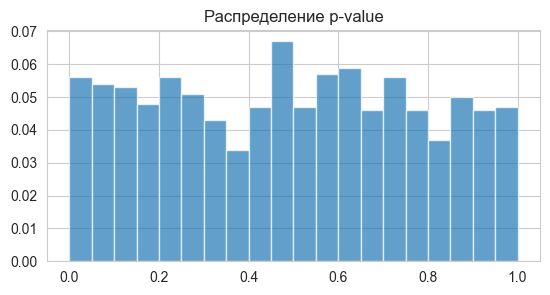

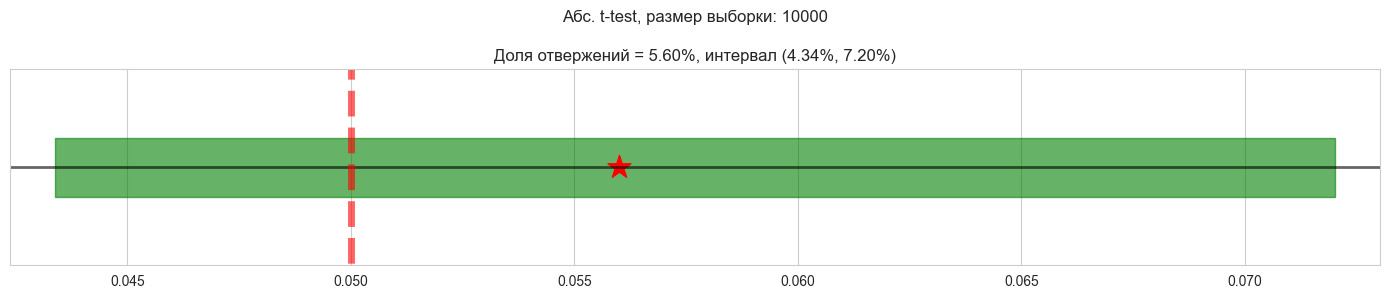

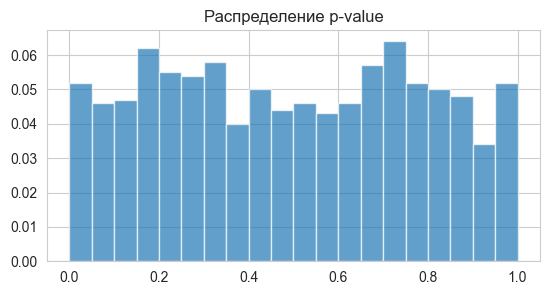

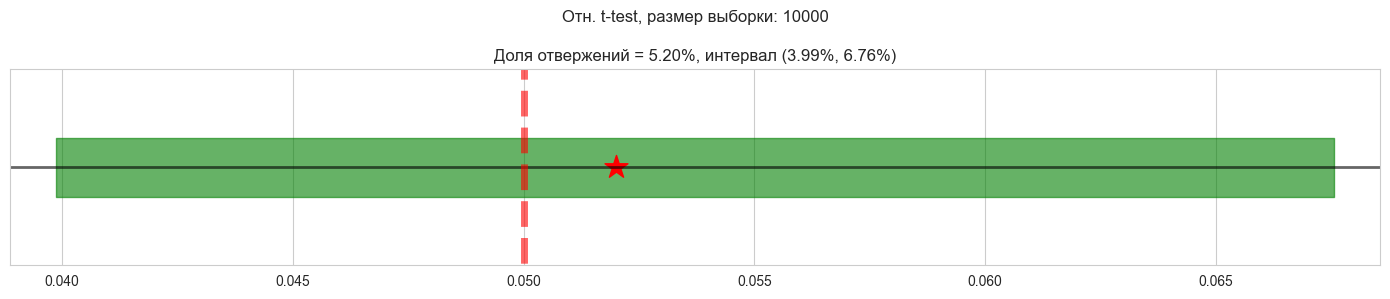

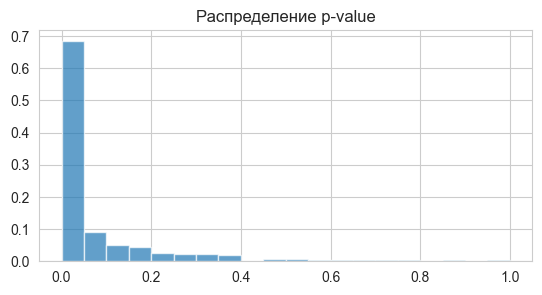

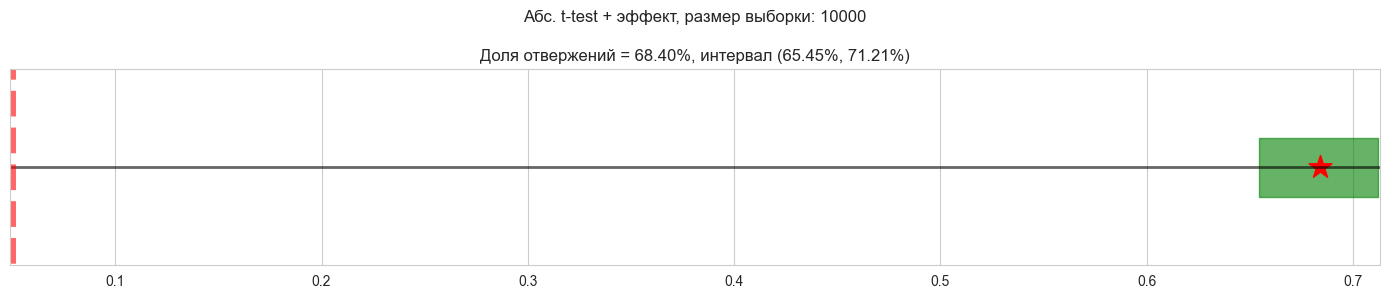

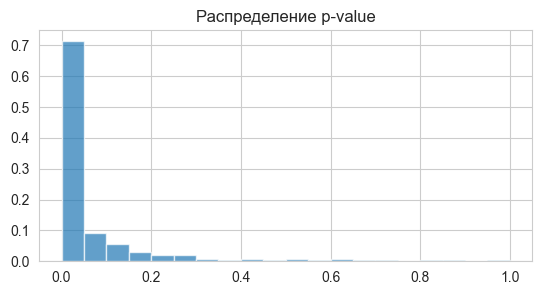

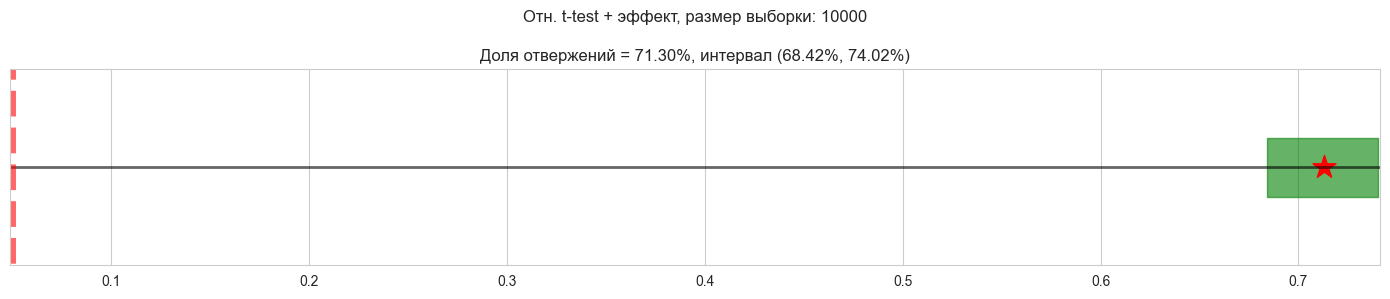

In [51]:
for sample_size in [10000]:
    run_experiments(sps.ttest_ind, df, sample_size, f'Абс. t-test, размер выборки: {sample_size}')
    run_experiments(sps.ttest_rel, df, sample_size, f'Отн. t-test, размер выборки: {sample_size}')
    run_experiments(sps.ttest_ind, df, sample_size, f'Абс. t-test + эффект, размер выборки: {sample_size}', effect=0.05)
    run_experiments(sps.ttest_rel, df, sample_size, f'Отн. t-test + эффект, размер выборки: {sample_size}', effect=0.05)

*Провалидировали*

Теперь рассмотрим стратификацию по операционной системе. Выполните разделение на бакеты внутри каждой страты и проверьте равномерность разбиения.

Учтите, что в одном бакете должны быть пользователи только из одной страты, тем самым стратификация возможна на выборке бакетов.

In [52]:
def random_sampler(data, sample_size):
    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[sample_size:]

def sample_mean_diff(data, sample_size, n_iter):
    mean_sample = np.zeros(n_iter)
    for i in tqdm(range(n_iter)):
        groups = random_sampler(data, sample_size)
        mean_sample[i] = groups[0]['sample'].mean() - groups[1]['sample'].mean()
    return mean_sample

def calculate_strata_weights(data):
    strata_weights = data.groupby(by='strata')[data.columns[0]].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

def weighted_mean(data, weights):
    strata_means = data.groupby(by='strata')[data.columns[0]].mean()
    return (strata_means * weights).sum()

def simple_mean(data, weights):
    return data['sample'].mean()

def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    strata_weights = calculate_strata_weights(data)
    mean_sample = np.zeros(n_iter)
    for i in tqdm(range(n_iter)):
        groups = sampler(data, sample_size)  # Семплирование
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)  # Вычисление разности средних
    return mean_sample

def weighted_var(data, strata_weights):
    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)

def weighted_post_var(data, strata_weights):
    strata_vars = data.groupby(by='strata')[data.columns[0]].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition

def simple_var(data, strata_weights):
    return data['sample'].var() / len(data)

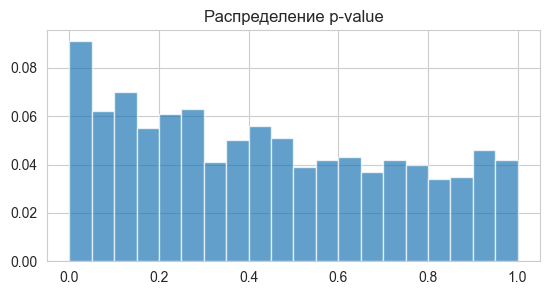

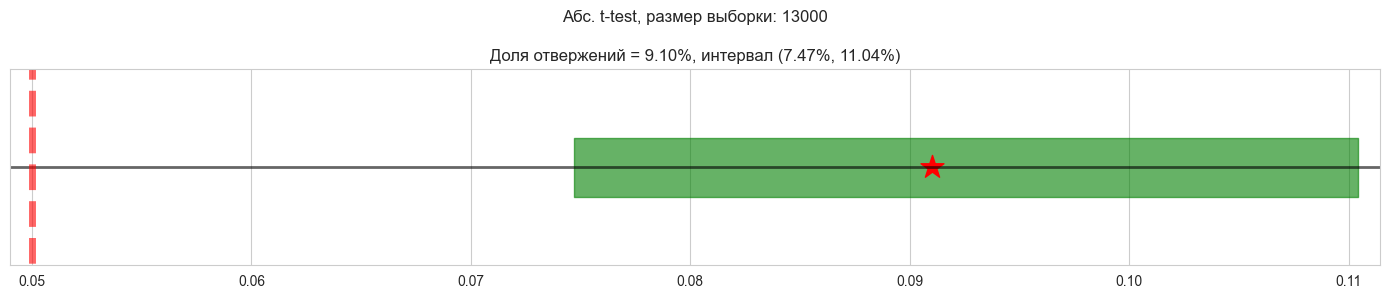

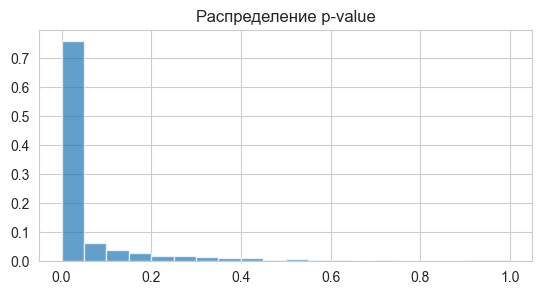

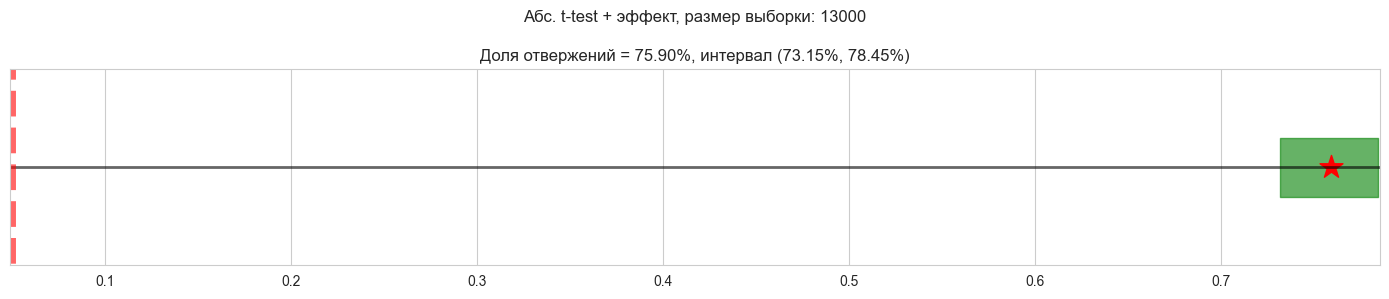

(0.759, 0.7315330470912914, 0.784484692013191)

In [53]:
opt_sample_size = 13000

strata_weights = calculate_strata_weights(df)

def stratified_ttest(x_data, y_data, method='post_stratified', alpha=0.05):  # выше я много удалил, проще было заново скопировать из ноутбука
    '''Стратифицированный абсолютный t-test.'''
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    return stat, pvalue, left_bound, right_bound

run_experiments(stratified_ttest, df, opt_sample_size, f'Абс. t-test, размер выборки: {opt_sample_size}', stratified=True)
run_experiments(stratified_ttest, df, opt_sample_size, f'Абс. t-test + эффект, размер выборки: {opt_sample_size}', effect=0.05, stratified=True)

Провалидируйте метод бакетов со стратификацией.

**Выводы:** *в этой задаче блииже познакомились с методом бакетов*

---
### Задача 3.

Для всех критериев из задач AB.4.2 и AB.3.2, которые прошли валидацию по вероятности ошибки I рода, оцените MDE и сравните по нему критерии.

In [55]:
run_experiments(sps.ttest_ind, df, n_iter=1000, sample_size=15000, effect=0.055)  # Абс. t-test
run_experiments(sps.ttest_rel, df, n_iter=1000, sample_size=15000, effect=0.055)  # Отн. t-test
run_experiments(lambda x, y : stratified_ttest(x, y, method='post_stratified'), df, n_iter=1000, sample_size=15000, stratified=True, title='Страт. t-test', effect=0.05)

KeyboardInterrupt: 

**Выводы:** *стратифицированный т-тест помощнее абс. и отн. т-теста*



---

### Задача 4.


Рассмотрим <a href="https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast">данные</a> о продажах 45 супермаркетов торговой сети Walmart с 2010 по 2012 годы. Датасет содержит 4 файла:
* `features.csv` &mdash; информация по неделям о средней температуре воздуха, цене на топливо, а также различная информация о рекламных акциях Walmart;

* `stores.csv` &mdash; информация о размере магазинов;

* `train.csv` &mdash; информация о недельных продажах для каждого отдела каждого магазина;

* `test.csv` &mdash; в данной задаче не требуется.

**Цель:** построить дизайн АБ-теста и ответить на вопрос, сколько магазинов потребуется для проведения AB-теста.

**Срок АБ-теста:** от 4 до 8 недель.

**Ожидаемый эффект:** +5% к продажам магазина суммарно по всем отделам.

---

Нужно попробовать и сравнить разные подходы CUPED и стратификации, используя различные варианты дополнительных данных:
* без использования доп. данных, то есть простой t-test;
* данные о продажах предпериода, то есть стандартный CUPED;
* категориальные признаки, то есть простая стратификация;
* вещественные признаки, то есть CUPED при использовании различных ковариат;
* прогнозирование продаж с помощью различных моделей (CUPAC):
    * линейные модели;
    * градиентный бустинг;
    * нейронные сети.
    
Для построения нейронных сетей можно, например, использовать исторические данные продаж по разным отделам одного/нескольких магазинов для прогнозирования суммарной выручки за следующий период одного/нескольких магазинов. Можно дополнительно использовать другие признаки. Используйте любые подходящие архитектуры нейронных сетей.

*Внимание!* В данных представлено достаточно мало магазинов, поэтому *честную валидацию скорее всего выполнить не получится*. Используя имеющиеся данные <u><b>требуется только как можно больше уменьшить дисперсию, которая участвует в формуле MDE</b></u>.


Во всех случаях можно использовать любые реализации методов понижения дисперсии, в том числе через линейную регрессию.

**Выводы:** ...